# 数据降维

在统计学和机器学习中，存在所谓“**维数的灾难**”（**the curse of dimensionality**），特别是对于高度非参数的模型，该问题更加严重。

比如，如果我们考虑使用高阶多项式进行拟合：$$y_i=p\left(x_i\right)+u_i$$如果有$K$个解释变量，那么一阶多项式有$K+1$（包含常数项）个参数，而二阶多项式（包含交叉项）就有$C_K^2+K$个参数......随着多项式阶数的增加，未知参数的个数是指数级增加的，然而样本量是有限的，这就会导致模型的过拟合甚至完全拟合的情况。在各种模型，包括核函数回归、匹配等模型中，都存在这个问题。

此外，很多不同类型的数据也会有同样的问题，比如图像数据、文本数据、语音数据等，都会存在数据维度太高的问题。比如，文本数据的特征提取最简单的方法是定义某个句子中是否存在某一个词，然而在每种语言中，词汇数量都非常多，如果我们考虑20000个中文词汇，那么每个句子会被翻译成一个20000维的问题，维数非常之高。

不同的模型解决以上问题的方法有很多，比如在回归分析中使用正则化的方法等。也有一些其他的**降维**（**dimension reduction**）方法可以在模型训练之前预先完成，常见的方法包括主成分分析、流形学习等。我们这一节简要介绍以下降维的常用方法。

# 主成分分析

主成分分析是最简单也是非常常用的数据降维方法。

考虑一组$D$维数据，对于某一个样本$x_i\in \mathbb{R}^D$，我们希望找到一个低维的$m_i\in\mathbb{R}^d,d<D$在尽量不损失信息的条件下代表原始的$D$维数据，与此同时还可以将$m_i$通过某种计算方式还原$y_i\in \mathbb{R}^D$，由于该过程一定有信息损失，所有$y_i\neq x_i$，不过我们可以最小化该损失。

一般的，我们可以找到一个函数$g\left(x\right)$，以及一个函数$h\left(m\right)$，通过$m=g\left(x\right)$计算降维的结果，并使用$y=h\left(m\right)$将其还原。最小化信息损失可以使用距离，比如欧式距离来衡量：$$\min ||y-x||_2=||h\left[ g\left(x\right)\right]-x||_2$$

主成分分析法通过假设$g\left(x\right)$和$h\left(m\right)$都是线性函数来构造这两个映射。我们知道，线性函数都可以通过矩阵来表示，从而假设$g\left(x\right)=U'x$其中$U$是一个$D\times d$的矩阵。在主成分分析中，假设$U$的每一列都是相互正交、长度为1的列向量，那么自然有：$$U'U=I_d$$即单位阵。

如果$U$是一个$D\times D$的正交矩阵，那么自然有$U_{-1}=U'$，从而$U'U=UU'=I_D$，而我们这里$U$是一个$D\times d$的矩阵，不过将$U'x\in \mathbb{R}^d$还原回$\mathbb{R}^D$的自然的矩阵即$$y=UU'x$$

带入到以上目标函数中，我们记$X=\left[x_1',x_2',...,x_N'\right]$为$N\times K$的数据矩阵，我们需要最小化：$$\sum_{i=1}^N ||UU'x_i-x_i||_2^2=\sum_{i=1}^N \left(UU'x_i-x_i\right)'\left(UU'x_i-x_i\right)=trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]$$

可以计算：$$trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]=trace\left[UU'X'XUU'-UU'X'X-X'XUU'+X'X\right] \\ =trace\left[UU'X'XUU'\right]-trace\left[UU'X'X\right]-trace\left[X'XUU'\right]+trace\left[X'X\right] \\ = trace\left[U'X'XUU'U\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ 
=trace\left[U'X'XU\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ = -trace\left[U'X'XU\right]+trace\left[X'X\right] $$

而最后一部分与$U$无关，第一部分实际上就是$Y=XUU'$的每一列的方差之和：$$trace(Y'Y)=trace(UU'X'XUU')=trace(U'X'XUU'U)=trace(U'X'XU)$$所以最小化$x_i$和$y_i$之间的距离，等价于最大化以上的方差之和。

之所以最大化方差，直觉上是因为方差的大小可以看做信息量的多少：方差越大，那么包含在随机变量里面的“信息”越多，比如线性回归中，自变量的方差越大，系数的标准误就会越小，线性回归中的$R^2$也是通过对$y$的方差进行分解而得到的。

一个简单的例子，比如：$x\sim N\left(3,6\right)$，而$y=1+2x+u, u\sim N\left(0,12\right)$这个系统里面有两个随机性的来源：$x$和$u$，我们现在希望找到包含在$x$和$y$里面的信息量最大的组合，如下图所示，方差最大的方向应该是沿着回归线的方向，为了方便展示，我们将以上数据进行标准化：

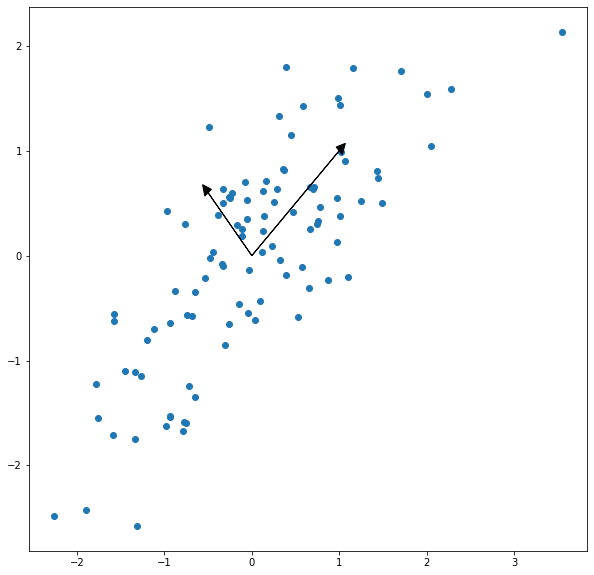

In [1]:
import numpy as np

N=100
x=np.random.normal(3,np.sqrt(6),N)
y=1+2*x+np.random.normal(0,np.sqrt(12),N)
x=(x-x.mean())/x.std()
y=(y-y.mean())/y.std()
# 画图
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
ax = plt.axes()
plt.scatter(x,y)
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, -0.5, 0.6, head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.show()

从而对于这个2维的数据，最重要的、方差最大的成分应该是沿着回归直线方向的成分。实际上从这点来看，主成分分析无非是一种坐标变换：将坐标变换为方差最大的方向即是最大的主成分。

为了完成以上的最大化问题，主要到如果假设$X$的每个变量均值为0，那么$\Sigma=X'X$就是$X$的协方差矩阵，从而只需要将$\Sigma$矩阵进行特征值分解：$$\Sigma=\Gamma'\Lambda\Gamma$$由于$\Sigma$是实对称矩阵，所以$\Gamma$可以规范化为一个正交矩阵，而$\Lambda$为对角矩阵，由于$\Sigma$是正定矩阵，所以其特征值一定大于0，我们假设$\Lambda$中的特征值从大到小排列。那么可以构造：$$U=\Gamma_d$$其中$\Gamma_d$为$\Gamma$矩阵的前$d$列。